### Data Source From : https://github.com/chiluen/Fintech_NanShan

In [1]:
import pandas as pd 
import numpy as np
import os
path = '...'

CLAIM_ACCT_FIN = pd.read_csv(path+'CLAIM_ACCT_FIN.csv')
COV_ACCT_FIN = pd.read_csv(path+'COV_ACCT_FIN.csv')
CUST_PROPERTY_FIN = pd.read_csv(path+'CUST_PROPERTY.csv')
CUST_RELATION_FIN = pd.read_csv(path+'CUST_RELATION_FIN.csv')

In [2]:
CLAIM_ACCT_FIN = CLAIM_ACCT_FIN.drop(CLAIM_ACCT_FIN.columns[0],axis=1)

In [3]:
COV_ACCT_FIN = COV_ACCT_FIN.drop(COV_ACCT_FIN.columns[0],axis=1)

In [4]:
CUST_PROPERTY_FIN = CUST_PROPERTY_FIN.drop(CUST_PROPERTY_FIN.columns[0],axis=1)

In [5]:
CUST_RELATION_FIN = CUST_RELATION_FIN.drop(CUST_RELATION_FIN.columns[0],axis=1)

### Take a look
* 理賠檔(CLAIM_ACCT_FIN)
* 客戶屬性檔(CUST_PROPERTY_FIN)
* 再購明細檔(COV_ACCT_FIN)
* 客戶關係檔(CUST_RELATION_FIN)

In [6]:
#理賠檔
CLAIM_ACCT_FIN.head(5)

,INJURED_RK,Claim_RK,Policy_RK,BundleSubtype2,illness_code,illness_desc,DiagnosisCode_DESC,claim_settle_dt,REIMBURSED_YR_TW,INSURED_RK,POLICY_HOLDER_RK,MATURITY_BENEFICIARY_RK,DEATH_BENEFICIARY_RK
0,14,4034,72224,5.N疾病醫療,A09,感染性胃腸炎及大腸炎,01.傳染病和寄生蟲病,2017-03-10,8505.00,14,212635,NaN,NaN
1,14,62576,72224,4.C重大疾病,N19,腎衰竭,14.泌尿生殖系統疾病,2016-08-19,4200.00,14,212635,NaN,NaN
2,14,90970,72224,5.N疾病醫療,H26.9,白內障,07.眼和附器疾病,2016-12-04,29102.85,14,212635,NaN,NaN
3,14,230243,72224,1.D身故給付,V99,運輸意外事故,20.疾病和死亡的外因,2017-03-10,2131618.65,14,212635,NaN,NaN
4,24,157920,91033,5.N疾病醫療,R19.7,"腹瀉,未特定",18.症狀異常所見，不可歸類,2017-06-29,32452.35,30372,70614,NaN,NaN


In [7]:
#再購明細檔
COV_ACCT_FIN.head(5)

,INSURED_RK,Policy_RK,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK,AFYP_NT,MATURITY_BENEFICIARY_RK,DEATH_BENEFICIARY_RK
0,20,182361,1,年繳,2018-11-30,CAB,AHb,198568,3864.0,NaN,198568.0
1,20,182362,0,年繳,2018-11-30,NPBBR,AHc,198568,3045.0,198568.0,198568.0
2,20,182362,0,年繳,2018-11-30,PAR,AHc,198568,472.5,198568.0,198568.0
3,20,182362,0,年繳,2018-11-30,AMN,AHc,198568,850.5,198568.0,198568.0
4,20,182362,0,年繳,2018-11-30,NHSA,AHa,198568,3675.0,198568.0,198568.0


In [8]:
#客戶屬性檔
CUST_PROPERTY_FIN.head(5)

,CUST_RK,ternure_m,recency_m,SIN,SIN_his,REG,REG_his,ILP,ILP_his,AHa,...,WEALTH_LEVEL,CLIENT_MARITAL,CLIENT_INCOME,DIGI_FLG,TOPCARD,GENDER,stick_level2,cust_group2,TOTAL_AUM,INSURED_DOB
0,24,201,201,0,0,1,1,0,0,0,...,W7,NaN,0,0,0,1,S10,G4,396720.0,1984-04-04
1,152,175,175,0,0,1,1,0,0,1,...,W6,NaN,0,0,0,1,S10,G4,165870.0,1951-02-26
2,155,227,227,0,0,1,1,0,0,1,...,W7,NaN,0,0,0,1,S10,G4,NaN,1976-07-19
3,158,165,165,0,0,0,0,0,0,1,...,W7,NaN,0,0,0,1,S10,G4,68362.0,1978-12-09
4,204,181,181,0,0,1,1,0,0,1,...,W7,NaN,0,0,0,1,S10,G4,68400.0,1976-09-20


In [9]:
#客戶關係檔
CUST_RELATION_FIN.head(5)

,INJURED_RK,householder_RK,Relation_RK,Relation
0,238,238,135763,{祖孫、兄弟姊妹}以外的二等以上親屬
1,239,16646,16646,配偶
2,242,242,23899,父母/子女
3,244,244,23915,{祖孫、兄弟姊妹}以外的二等以上親屬
4,245,245,6084,{祖孫、兄弟姊妹}以外的二等以上親屬


### Define Y
* 理賠要保&被保險人在再購檔裡有當要或被保人
* 意識到保單重要的人有幫自己或幫具可保利益的人投保

In [10]:
CLAIM_ACCT_FIN.columns

Index(['INJURED_RK', 'Claim_RK', 'Policy_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'INSURED_RK', 'POLICY_HOLDER_RK',
       'MATURITY_BENEFICIARY_RK', 'DEATH_BENEFICIARY_RK'],
      dtype='object')

In [11]:
#理賠要被保set
Y_set = set(list(CLAIM_ACCT_FIN['INSURED_RK'])+ list(CLAIM_ACCT_FIN['POLICY_HOLDER_RK']))

In [12]:
COV_ACCT_FIN.columns

Index(['INSURED_RK', 'Policy_RK', 'RIDER_CD', 'payment_period', 'EFFECTIVE_DT',
       'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK', 'AFYP_NT',
       'MATURITY_BENEFICIARY_RK', 'DEATH_BENEFICIARY_RK'],
      dtype='object')

In [13]:
#被保人RK是否在理賠要被保set
COV_ACCT_FIN['INSURED_RK'].isin(Y_set).value_counts()

False    79181
True     55291
Name: INSURED_RK, dtype: int64

In [14]:
#要保人RK是否在理賠要被保set
COV_ACCT_FIN['POLICY_HOLDER_RK'].isin(Y_set).value_counts()

True     94327
False    40145
Name: POLICY_HOLDER_RK, dtype: int64

In [15]:
COV_ACCT_FIN['Y']=0

In [16]:
COV_ACCT_FIN.loc[(COV_ACCT_FIN['INSURED_RK'].isin(Y_set)) & (COV_ACCT_FIN['POLICY_HOLDER_RK'].isin(Y_set)),'Y']=1

In [17]:
COV_ACCT_FIN['Y'].value_counts()

0    81577
1    52895
Name: Y, dtype: int64

In [18]:
COV_ACCT_FIN['Y'].value_counts()[1]/len(COV_ACCT_FIN['Y']) *100 
#39%的樣本被定義為再購

39.335326313284554

In [19]:
COV_ACCT_FIN.head(10)

,INSURED_RK,Policy_RK,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK,AFYP_NT,MATURITY_BENEFICIARY_RK,DEATH_BENEFICIARY_RK,Y
0,20,182361,1,年繳,2018-11-30,CAB,AHb,198568,3864.0,NaN,198568.0,0
1,20,182362,0,年繳,2018-11-30,NPBBR,AHc,198568,3045.0,198568.0,198568.0,0
2,20,182362,0,年繳,2018-11-30,PAR,AHc,198568,472.5,198568.0,198568.0,0
3,20,182362,0,年繳,2018-11-30,AMN,AHc,198568,850.5,198568.0,198568.0,0
4,20,182362,0,年繳,2018-11-30,NHSA,AHa,198568,3675.0,198568.0,198568.0,0
5,20,182362,0,年繳,2018-11-30,HIR,AHa,198568,1690.5,198568.0,198568.0,0
6,20,182362,0,年繳,2018-11-30,ZDDR,AHb,198568,10878.0,198568.0,198568.0,0
7,20,182362,1,年繳,2018-11-30,20PCHI,AHa,198568,15582.0,198568.0,198568.0,0
8,248,58361,1,年繳,2018-02-22,6WPA,AHc,248,63000.0,46032.0,46032.0,0
9,248,179169,1,躉繳保費,2018-09-29,BVA,ILP,248,1050000.0,NaN,46032.0,0


### 創建一個主檔

In [20]:
import copy
data = copy.deepcopy(COV_ACCT_FIN)

In [21]:
data.columns #在購當主檔

Index(['INSURED_RK', 'Policy_RK', 'RIDER_CD', 'payment_period', 'EFFECTIVE_DT',
       'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK', 'AFYP_NT',
       'MATURITY_BENEFICIARY_RK', 'DEATH_BENEFICIARY_RK', 'Y'],
      dtype='object')

In [22]:
CLAIM_ACCT_FIN.columns #理賠檔當右檔

Index(['INJURED_RK', 'Claim_RK', 'Policy_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'INSURED_RK', 'POLICY_HOLDER_RK',
       'MATURITY_BENEFICIARY_RK', 'DEATH_BENEFICIARY_RK'],
      dtype='object')

看一下再購檔過去理賠甚麼商品(被對被);如果值是空的,代表有再購沒理賠
1. 他理賠期間不在data範圍
2. 沒理賠是新購

In [23]:
data = pd.merge(data, CLAIM_ACCT_FIN, left_on='INSURED_RK', right_on='INSURED_RK',how='left')

### RS Table

In [24]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),5) 

    return summary

In [25]:
resumetable(data)

Dataset Shape: (180267, 24)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,INSURED_RK,int64,0,48169,20,20,20,14.85690
1,Policy_RK_x,int64,0,74248,182361,182362,182362,15.57480
2,RIDER_CD,int64,0,2,1,0,0,0.99376
3,payment_period,object,0,5,年繳,年繳,年繳,1.19182
4,EFFECTIVE_DT,object,0,730,2018-11-30,2018-11-30,2018-11-30,9.26523
5,SHORT_NAME,object,0,171,CAB,NPBBR,PAR,5.79868
6,prod_detail2,object,0,7,AHb,AHc,AHc,2.52116
7,POLICY_HOLDER_RK_x,int64,0,39559,198568,198568,198568,14.51697
8,AFYP_NT,float64,0,16173,3864,3045,472.5,10.67989
9,MATURITY_BENEFICIARY_RK_x,float64,60475,29599,NaN,198568,198568,14.16461


### Feature Engineering: RFM Model
RFM stands for Receency, Frequency, and Monetary.

* Recency : 最近一次消費 -> 計算保單再購日期-理賠發生日過了幾個月/天/分鐘/秒

In [26]:
#看一下join完日期有沒有爆掉
data['claim_settle_dt'].isna().value_counts()

True     91850
False    88417
Name: claim_settle_dt, dtype: int64

In [27]:
#處理日期:用再購日期-理賠發生日
data['EFFECTIVE_DT'] = pd.to_datetime(data['EFFECTIVE_DT'], format='%Y-%m-%d')
data['claim_settle_dt'] = pd.to_datetime(data['claim_settle_dt'], format='%Y-%m-%d')

In [28]:
data['EffClaim_daydiff'] = data['EFFECTIVE_DT'] - data['claim_settle_dt']

In [29]:
data.shape

(180267, 25)

In [30]:
for col in data.columns:
    if'_y' in col:
        data = data.drop(col,axis=1)

In [31]:
data.columns

Index(['INSURED_RK', 'Policy_RK_x', 'RIDER_CD', 'payment_period',
       'EFFECTIVE_DT', 'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK_x',
       'AFYP_NT', 'MATURITY_BENEFICIARY_RK_x', 'DEATH_BENEFICIARY_RK_x', 'Y',
       'INJURED_RK', 'Claim_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'EffClaim_daydiff'],
      dtype='object')

In [32]:
#簡易feature
data['EffClaim_Daydiff_D'] = data['EffClaim_daydiff'].astype('timedelta64[D]') 
data['EffClaim_Mindiff_M'] = data['EffClaim_daydiff'].astype('timedelta64[m]') 
data['EffClaim_Secdiff_S'] = data['EffClaim_daydiff'].astype('timedelta64[s]') 

In [33]:
#計算一下生效到理賠差幾個月
data['EffClaim_monthdiff']=data['EffClaim_daydiff']/np.timedelta64(1,'M')

In [34]:
data[data['EffClaim_daydiff'].isna() != True]['EffClaim_daydiff']

10       -73 days
11       -73 days
12       -73 days
13       -73 days
14        -4 days
           ...   
180091   313 days
180223   117 days
180224   117 days
180225   117 days
180226   117 days
Name: EffClaim_daydiff, Length: 88417, dtype: timedelta64[ns]

In [35]:
#計算一下生效到理賠差幾個月
data['EffClaim_monthdiff']=data['EffClaim_daydiff']/np.timedelta64(1,'M')#除一個月的間隔

In [36]:
#計算一下生效到理賠差幾週
data['EffClaim_weekdiff'] = (data['EffClaim_daydiff']/np.timedelta64(1, 'D') )/52

#### Frequency: 消費頻率
* Counts: INSURED_RK (理賠+再購)消費筆數

In [37]:
data_freqtable = data.groupby(['INSURED_RK']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

In [38]:
data = data.merge(data_freqtable,on='INSURED_RK',how='left')

In [39]:
data.shape

(180267, 27)

* 計算個人在當年度的平均購買件數, 總體購買件數 (一定leakage hehehe)

In [40]:
data.columns

Index(['INSURED_RK', 'Policy_RK_x', 'RIDER_CD', 'payment_period',
       'EFFECTIVE_DT', 'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK_x',
       'AFYP_NT', 'MATURITY_BENEFICIARY_RK_x', 'DEATH_BENEFICIARY_RK_x', 'Y',
       'INJURED_RK', 'Claim_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'EffClaim_daydiff', 'EffClaim_Daydiff_D',
       'EffClaim_Mindiff_M', 'EffClaim_Secdiff_S', 'EffClaim_monthdiff',
       'EffClaim_weekdiff', 'counts'],
      dtype='object')

In [41]:
data['EFFECTIVE_YM'] = [str(data['EFFECTIVE_DT'][i])[:7] for i in range(len(data))]

In [42]:
d = {'AFYP_NT':'AFYP_NT_mean', 'prod_detail2':'UserMonthly_count'}
data_cusmon_trend = data.groupby(['INSURED_RK','EFFECTIVE_YM'], as_index=False).agg({'AFYP_NT': 'mean','prod_detail2': 'count'}).rename(columns=d)

In [43]:
data_cusmon_trend

,INSURED_RK,EFFECTIVE_YM,AFYP_NT_mean,UserMonthly_count
0,20,2018-11,5.007188e+03,8
1,248,2018-02,6.300000e+04,1
2,248,2018-09,1.050000e+06,1
3,250,2017-05,1.698979e+04,4
4,250,2017-07,6.359220e+05,1
...,...,...,...,...
64666,251944,2017-08,1.067771e+06,1
64667,251944,2017-09,1.067771e+06,1
64668,251944,2018-02,9.829964e+05,1
64669,251944,2018-04,6.041525e+05,2


In [44]:
data = data.merge(data_cusmon_trend,on = ['INSURED_RK','EFFECTIVE_YM'],how='left')

In [45]:
data

,INSURED_RK,Policy_RK_x,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK_x,AFYP_NT,MATURITY_BENEFICIARY_RK_x,...,EffClaim_daydiff,EffClaim_Daydiff_D,EffClaim_Mindiff_M,EffClaim_Secdiff_S,EffClaim_monthdiff,EffClaim_weekdiff,counts,EFFECTIVE_YM,AFYP_NT_mean,UserMonthly_count
0,20,182361,1,年繳,2018-11-30,CAB,AHb,198568,3.864000e+03,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5.007188e+03,8
1,20,182362,0,年繳,2018-11-30,NPBBR,AHc,198568,3.045000e+03,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5.007188e+03,8
2,20,182362,0,年繳,2018-11-30,PAR,AHc,198568,4.725000e+02,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5.007188e+03,8
3,20,182362,0,年繳,2018-11-30,AMN,AHc,198568,8.505000e+02,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5.007188e+03,8
4,20,182362,0,年繳,2018-11-30,NHSA,AHa,198568,3.675000e+03,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5.007188e+03,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180262,251944,172739,1,躉繳保費,2017-09-01,UPISA,SIN,251944,1.067771e+06,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,5,2017-09,1.067771e+06,1
180263,251944,177608,1,躉繳保費,2018-02-01,BUISA,SIN,251944,9.829964e+05,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,5,2018-02,9.829964e+05,1
180264,251944,58859,1,年繳,2018-04-14,RLTC,AHd,79529,1.081773e+05,79529.0,...,NaT,NaN,NaN,NaN,NaN,NaN,5,2018-04,6.041525e+05,2
180265,251944,172892,1,躉繳保費,2018-04-28,UPISA,SIN,251944,1.100128e+06,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,5,2018-04,6.041525e+05,2


#### Monetary: 消費金額 
* REIMBURSED_YR_TW: 理賠金額(歸至該結案年度)
* AFYP_NT: 保單保費

### Feature Engineering: Product Promotion
Some premium might affected by product promotion.


In [46]:
#計算各個月份賣的商品數量, 來類比業務員行銷刺激強度對客戶再購意願是否有提升
data['EFFECTIVE_YM'] = [str(data['EFFECTIVE_DT'][i])[:7] for i in range(len(data))]

In [47]:
data.head(3)

,INSURED_RK,Policy_RK_x,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK_x,AFYP_NT,MATURITY_BENEFICIARY_RK_x,...,EffClaim_daydiff,EffClaim_Daydiff_D,EffClaim_Mindiff_M,EffClaim_Secdiff_S,EffClaim_monthdiff,EffClaim_weekdiff,counts,EFFECTIVE_YM,AFYP_NT_mean,UserMonthly_count
0,20,182361,1,年繳,2018-11-30,CAB,AHb,198568,3864.0,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5007.1875,8
1,20,182362,0,年繳,2018-11-30,NPBBR,AHc,198568,3045.0,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5007.1875,8
2,20,182362,0,年繳,2018-11-30,PAR,AHc,198568,472.5,198568.0,...,NaT,NaN,NaN,NaN,NaN,NaN,8,2018-11,5007.1875,8


Type 1: 僅用Short Name & 時間

In [48]:
prod_cnt_df = data.groupby(['SHORT_NAME','EFFECTIVE_YM']).size().reset_index(name='prod_cnt').sort_values(by = 'prod_cnt', ascending=False)

In [49]:
prod_cnt_df

,SHORT_NAME,EFFECTIVE_YM,prod_cnt
40,10TLTC,2018-04,1471
1217,MPL,2017-06,1264
1216,MPL,2017-05,1228
2134,UTME,2018-01,1137
41,10TLTC,2018-05,1090
...,...,...,...
151,20WCBR,2017-08,1
148,20WCAR,2018-10,1
147,20WCAR,2018-09,1
145,20WCAR,2018-07,1


In [50]:
data.shape

(180267, 30)

In [51]:
data = data.merge(prod_cnt_df,on = ['SHORT_NAME','EFFECTIVE_YM'],how='left') 

Type 2: 用Short Name & product detail & 時間

In [52]:
prod_cnt_detail_df = data.groupby(['SHORT_NAME','EFFECTIVE_YM','prod_detail2']).size().reset_index(name='prod_cnt_detail').sort_values(by = 'prod_cnt_detail',ascending=False)

In [53]:
prod_cnt_detail_df

,SHORT_NAME,EFFECTIVE_YM,prod_detail2,prod_cnt_detail
40,10TLTC,2018-04,AHd,1471
1217,MPL,2017-06,REG,1264
1216,MPL,2017-05,REG,1228
2134,UTME,2018-01,ILP,1137
41,10TLTC,2018-05,AHd,1090
...,...,...,...,...
151,20WCBR,2017-08,AHb,1
148,20WCAR,2018-10,AHb,1
147,20WCAR,2018-09,AHb,1
145,20WCAR,2018-07,AHb,1


In [54]:
data = data.merge(prod_cnt_detail_df,on = ['SHORT_NAME','EFFECTIVE_YM','prod_detail2'],how='left') 

### BusDay Practice

In [55]:
resumetable(data)

Dataset Shape: (180267, 32)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,INSURED_RK,int64,0,48169,20,20,20,14.85690
1,Policy_RK_x,int64,0,74248,182361,182362,182362,15.57480
2,RIDER_CD,int64,0,2,1,0,0,0.99376
3,payment_period,object,0,5,年繳,年繳,年繳,1.19182
4,EFFECTIVE_DT,datetime64[ns],0,730,2018-11-30 00:00:00,2018-11-30 00:00:00,2018-11-30 00:00:00,9.26523
5,SHORT_NAME,object,0,171,CAB,NPBBR,PAR,5.79868
6,prod_detail2,object,0,7,AHb,AHc,AHc,2.52116
7,POLICY_HOLDER_RK_x,int64,0,39559,198568,198568,198568,14.51697
8,AFYP_NT,float64,0,16173,3864,3045,472.5,10.67989
9,MATURITY_BENEFICIARY_RK_x,float64,60475,29599,NaN,198568,198568,14.16461


In [56]:
#先把 claim_settle_dt是na的, 當作沒理賠過, 讓他時間減出來是負的 
data.loc[data['claim_settle_dt'].isna(),'claim_settle_dt']= pd.to_datetime('2050-1-1', format='%Y-%m-%d')

In [57]:
data['busday_feat'] = np.busday_count(
    data['claim_settle_dt'].values.astype('datetime64[D]'), 
    data['EFFECTIVE_DT'].values.astype('datetime64[D]'),
    weekmask=[1,1,1,1,1,0,0]
    )

In [58]:
data[['EFFECTIVE_DT','claim_settle_dt','busday_feat']].head(10)

,EFFECTIVE_DT,claim_settle_dt,busday_feat
0,2018-11-30,2050-01-01,-8111
1,2018-11-30,2050-01-01,-8111
2,2018-11-30,2050-01-01,-8111
3,2018-11-30,2050-01-01,-8111
4,2018-11-30,2050-01-01,-8111
5,2018-11-30,2050-01-01,-8111
6,2018-11-30,2050-01-01,-8111
7,2018-11-30,2050-01-01,-8111
8,2018-02-22,2050-01-01,-8312
9,2018-09-29,2050-01-01,-8155


### EDA

In [59]:
df0 = data[data['Y']==0]
df1 = data[data['Y']==1]

In [60]:
rs = resumetable(data)

Dataset Shape: (180267, 33)


In [61]:
f_list = []
for i in range(len(rs['Name'])):
    if rs['dtypes'][i]=='float64' or rs['dtypes'][i]=='int64':
        f_list.append(rs['Name'][i])               

<Figure size 432x288 with 0 Axes>

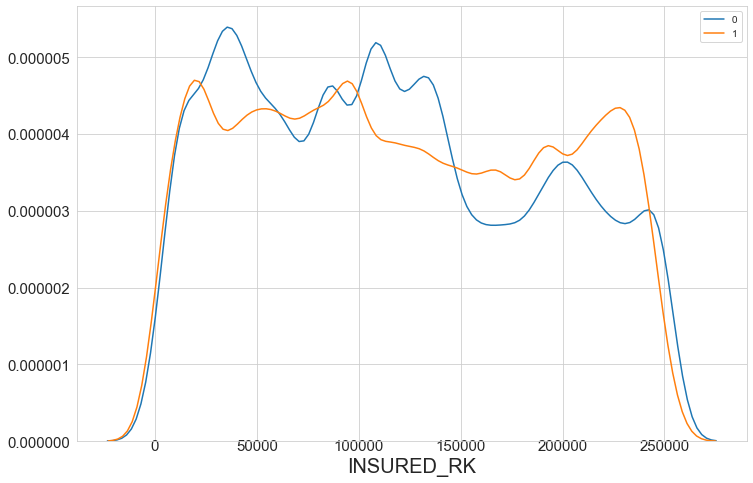

<Figure size 432x288 with 0 Axes>

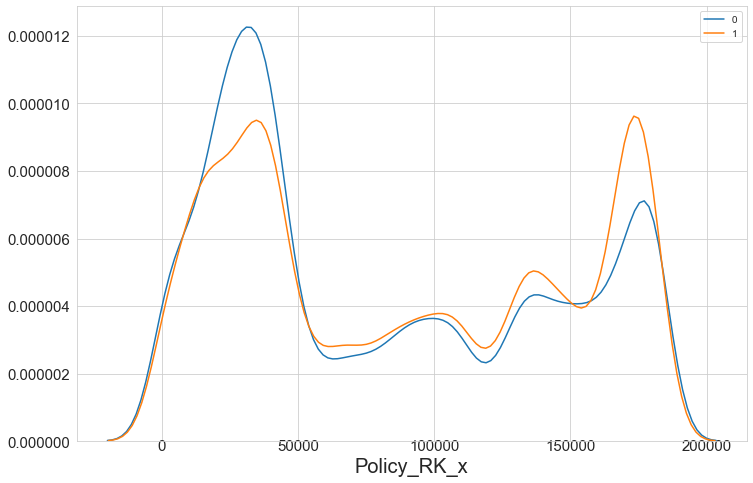

<Figure size 432x288 with 0 Axes>

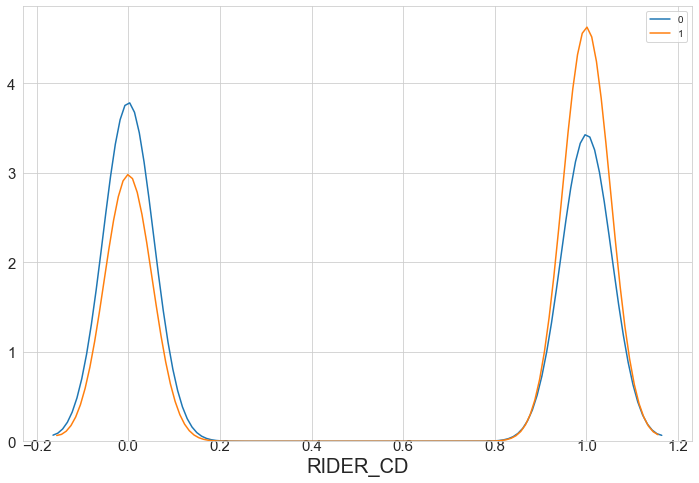

<Figure size 432x288 with 0 Axes>

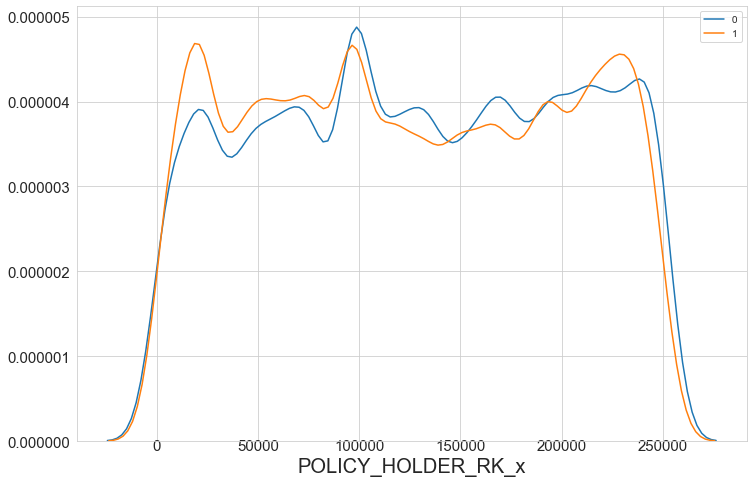

<Figure size 432x288 with 0 Axes>

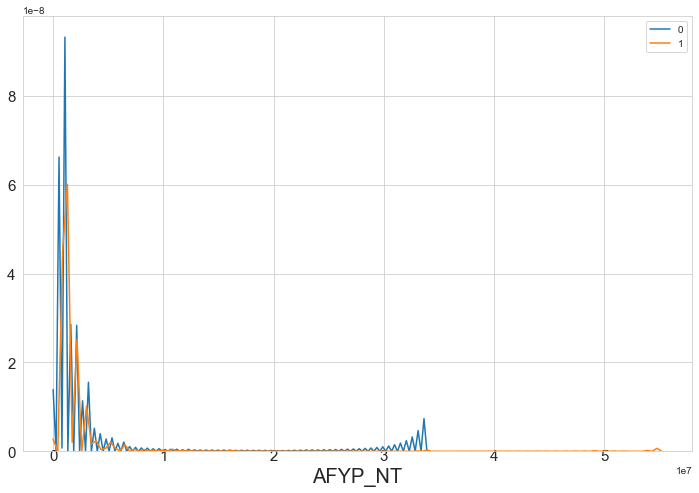

<Figure size 432x288 with 0 Axes>

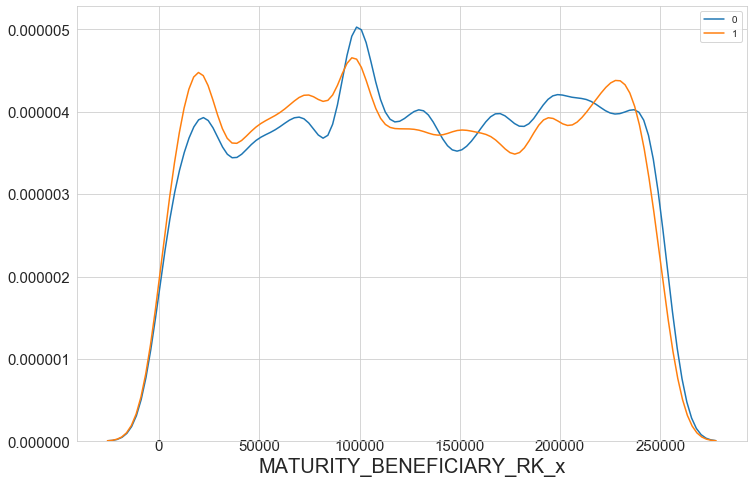

<Figure size 432x288 with 0 Axes>

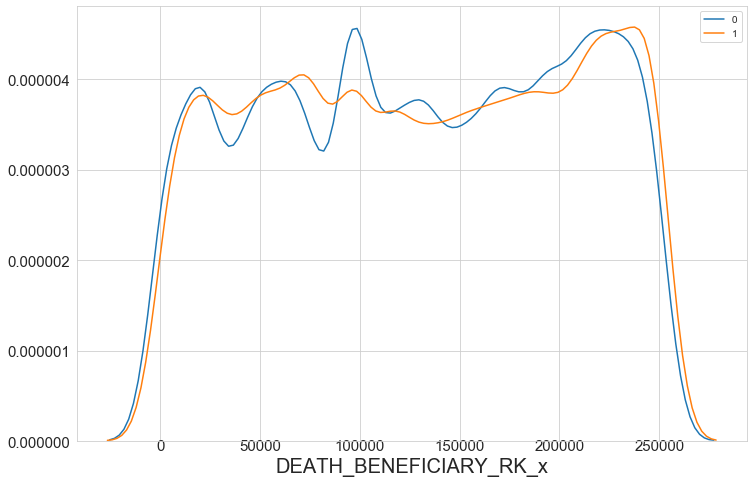

<Figure size 432x288 with 0 Axes>

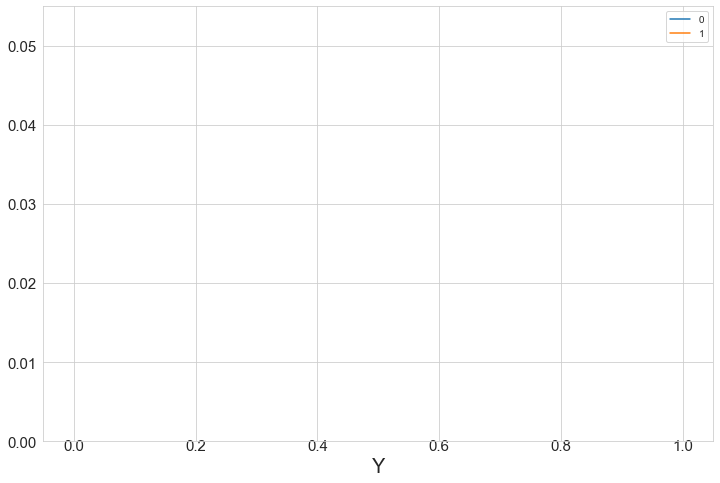

<Figure size 432x288 with 0 Axes>

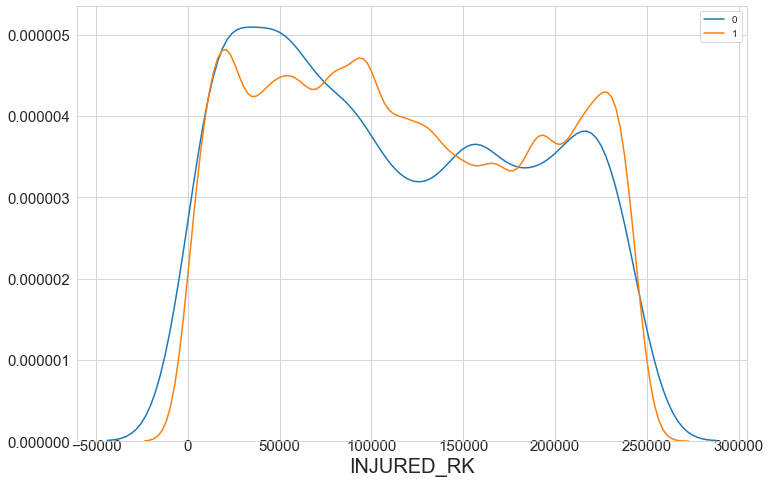

<Figure size 432x288 with 0 Axes>

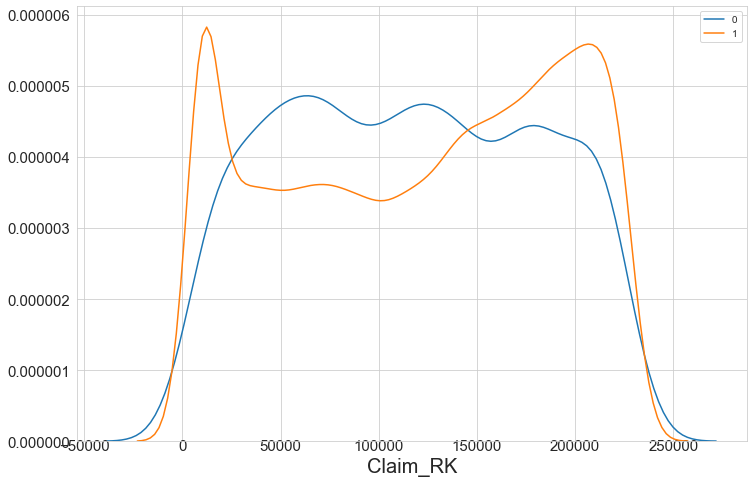

<Figure size 432x288 with 0 Axes>

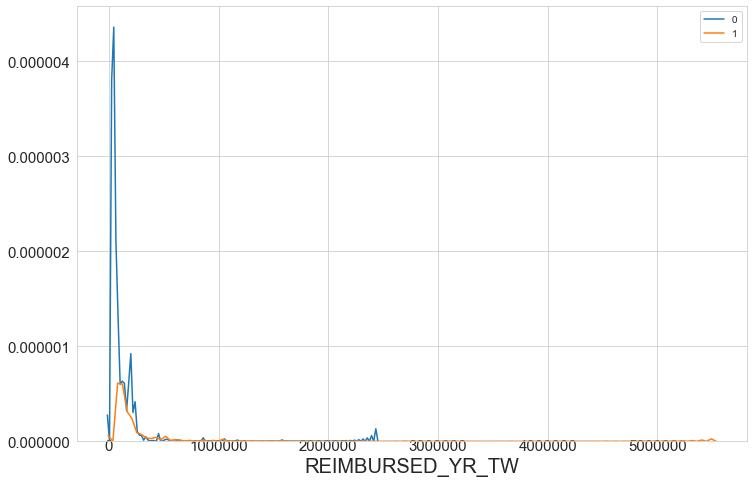

<Figure size 432x288 with 0 Axes>

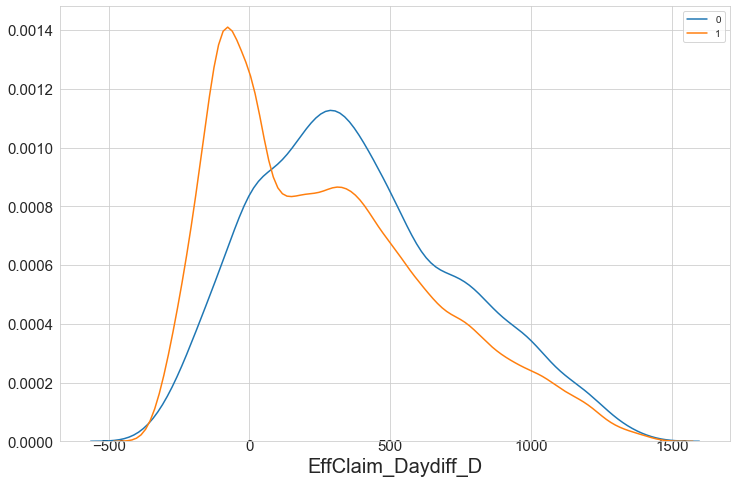

<Figure size 432x288 with 0 Axes>

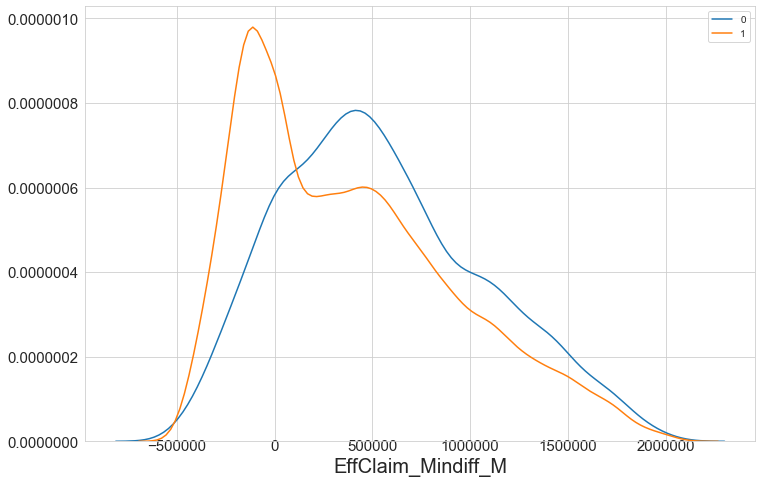

<Figure size 432x288 with 0 Axes>

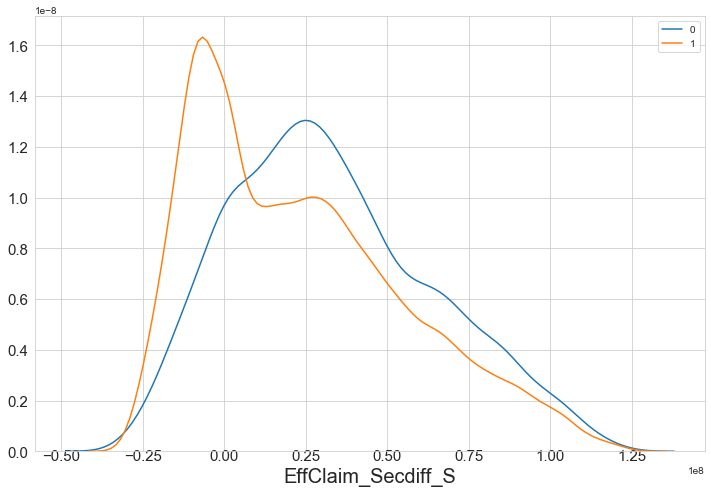

<Figure size 432x288 with 0 Axes>

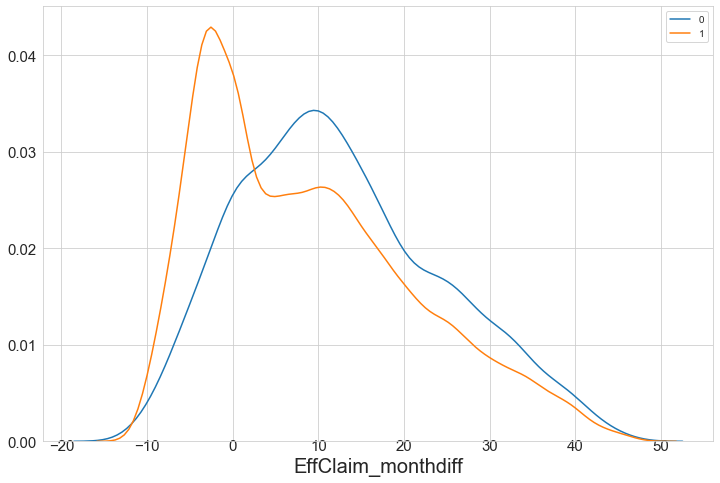

<Figure size 432x288 with 0 Axes>

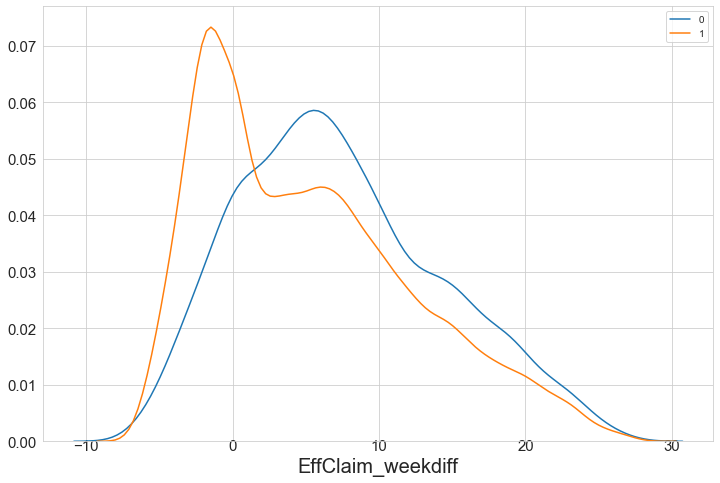

<Figure size 432x288 with 0 Axes>

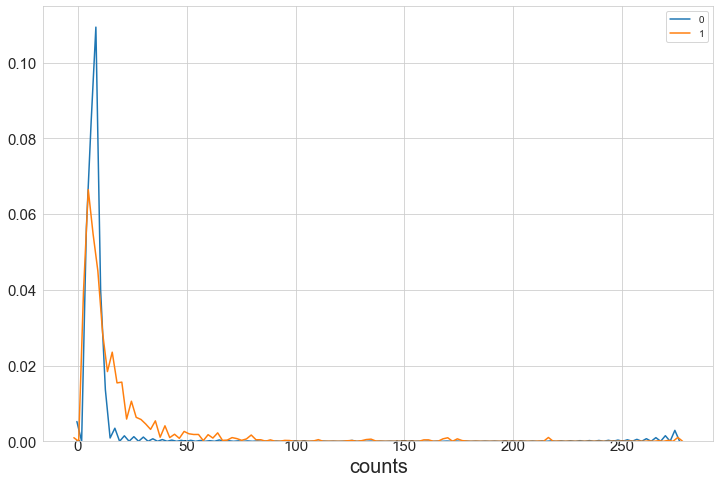

<Figure size 432x288 with 0 Axes>

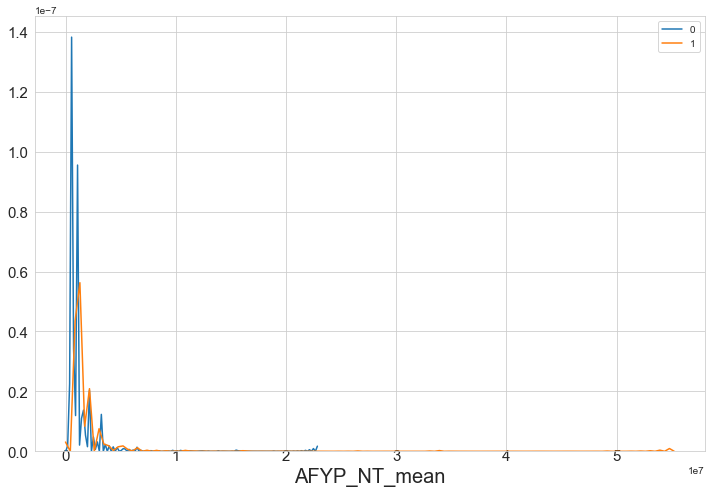

<Figure size 432x288 with 0 Axes>

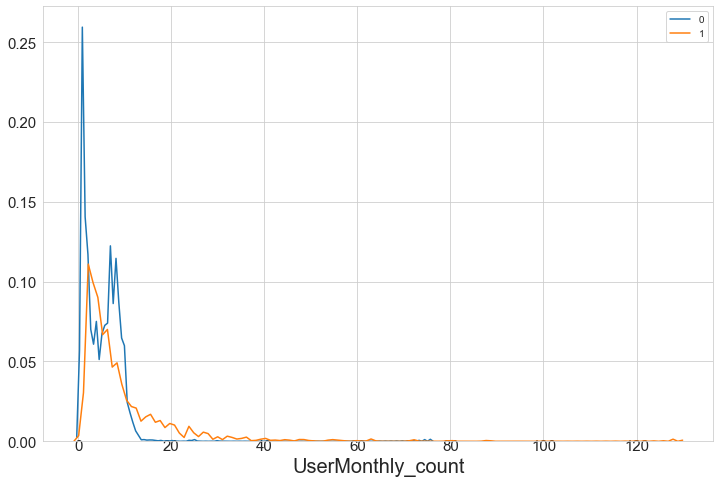

<Figure size 432x288 with 0 Axes>

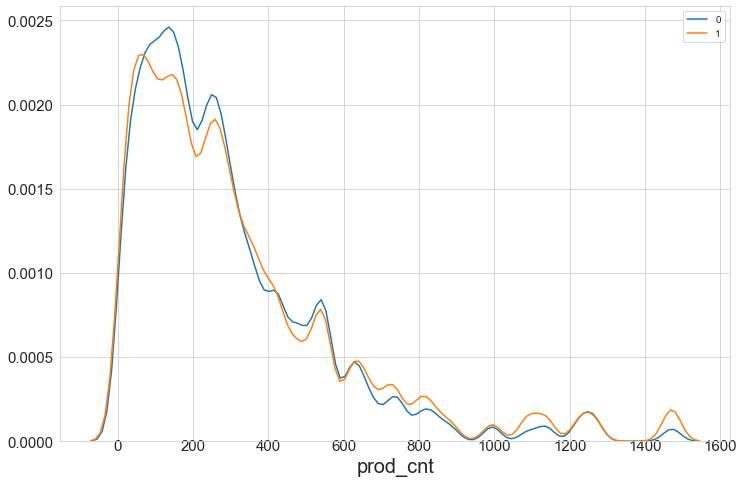

<Figure size 432x288 with 0 Axes>

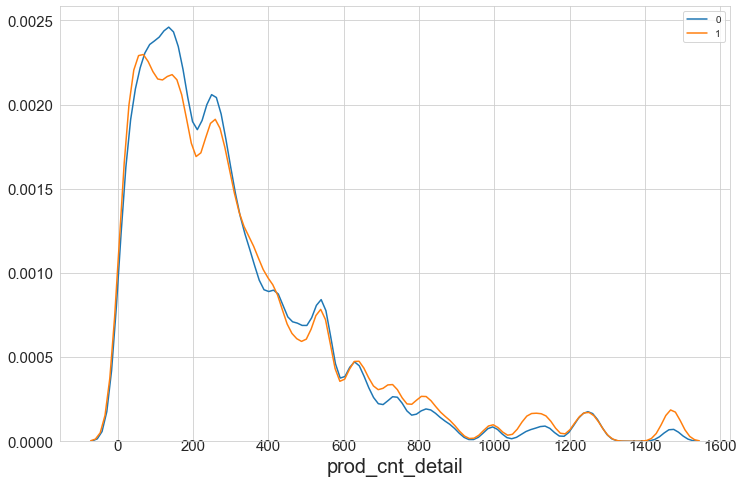

<Figure size 432x288 with 0 Axes>

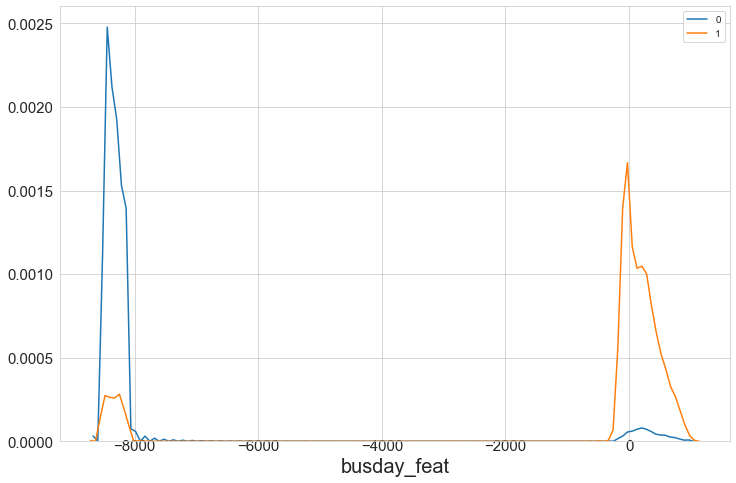

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in f_list:
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    sns.distplot(df0[feature], hist=False,label='0')
    sns.distplot(df1[feature], hist=False,label='1')
    plt.xlabel(feature, fontsize=20)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=15, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=15)
    plt.show()

In [65]:
data.head(10)

,INSURED_RK,Policy_RK_x,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK_x,AFYP_NT,MATURITY_BENEFICIARY_RK_x,...,EffClaim_Secdiff_S,EffClaim_monthdiff,EffClaim_weekdiff,counts,EFFECTIVE_YM,AFYP_NT_mean,UserMonthly_count,prod_cnt,prod_cnt_detail,busday_feat
0,20,182361,1,年繳,2018-11-30,CAB,AHb,198568,3864.0,NaN,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,120,120,-8111
1,20,182362,0,年繳,2018-11-30,NPBBR,AHc,198568,3045.0,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,254,254,-8111
2,20,182362,0,年繳,2018-11-30,PAR,AHc,198568,472.5,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,310,310,-8111
3,20,182362,0,年繳,2018-11-30,AMN,AHc,198568,850.5,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,217,217,-8111
4,20,182362,0,年繳,2018-11-30,NHSA,AHa,198568,3675.0,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,149,149,-8111
5,20,182362,0,年繳,2018-11-30,HIR,AHa,198568,1690.5,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,154,154,-8111
6,20,182362,0,年繳,2018-11-30,ZDDR,AHb,198568,10878.0,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,28,28,-8111
7,20,182362,1,年繳,2018-11-30,20PCHI,AHa,198568,15582.0,198568.0,...,NaN,NaN,NaN,8,2018-11,5.007188e+03,8,111,111,-8111
8,248,58361,1,年繳,2018-02-22,6WPA,AHc,248,63000.0,46032.0,...,NaN,NaN,NaN,2,2018-02,6.300000e+04,1,3,3,-8312
9,248,179169,1,躉繳保費,2018-09-29,BVA,ILP,248,1050000.0,NaN,...,NaN,NaN,NaN,2,2018-09,1.050000e+06,1,243,243,-8155


In [66]:
data['Y'].value_counts()

1    96458
0    83809
Name: Y, dtype: int64

### Baseline
* 再購日期切train test
* 最低之Recency、最高之Frequency、最高之Monetary的高價值客戶，多多進行接觸以及行銷。

In [67]:
data = data.sort_values(by = 'EFFECTIVE_DT',ascending=True).reset_index(drop=True)

In [68]:
train_set = data[:160000]
test_set = data[160000:]

In [69]:
train_set.columns

Index(['INSURED_RK', 'Policy_RK_x', 'RIDER_CD', 'payment_period',
       'EFFECTIVE_DT', 'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK_x',
       'AFYP_NT', 'MATURITY_BENEFICIARY_RK_x', 'DEATH_BENEFICIARY_RK_x', 'Y',
       'INJURED_RK', 'Claim_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'EffClaim_daydiff', 'EffClaim_Daydiff_D',
       'EffClaim_Mindiff_M', 'EffClaim_Secdiff_S', 'EffClaim_monthdiff',
       'EffClaim_weekdiff', 'counts', 'EFFECTIVE_YM', 'AFYP_NT_mean',
       'UserMonthly_count', 'prod_cnt', 'prod_cnt_detail', 'busday_feat'],
      dtype='object')

In [70]:
resumetable(train_set)

Dataset Shape: (160000, 33)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,INSURED_RK,int64,0,43283,37840,79691,79691,14.71390
1,Policy_RK_x,int64,0,65193,49514,14772,14772,15.38297
2,RIDER_CD,int64,0,2,0,1,1,0.99532
3,payment_period,object,0,5,年繳,年繳,年繳,1.18983
4,EFFECTIVE_DT,datetime64[ns],0,605,2016-12-27 00:00:00,2016-12-27 00:00:00,2016-12-27 00:00:00,9.01434
5,SHORT_NAME,object,0,157,HIR,EVLRP,EVLRP,5.71912
6,prod_detail2,object,0,7,AHa,ILP,ILP,2.49412
7,POLICY_HOLDER_RK_x,int64,0,35536,37840,79691,79691,14.38334
8,AFYP_NT,float64,0,14572,607.95,12600,12600,10.61791
9,MATURITY_BENEFICIARY_RK_x,float64,53050,26775,NaN,224751,224751,14.02938


### Feature Selection

In [72]:
Feat_con_col = ['REIMBURSED_YR_TW', 'AFYP_NT', # M
        'EffClaim_Daydiff_D','EffClaim_Mindiff_M', 'EffClaim_Secdiff_S', 'EffClaim_monthdiff','EffClaim_weekdiff', 'busday_feat',#R
       'counts', #F 
        #        
        'prod_cnt','prod_cnt_detail','AFYP_NT_mean','UserMonthly_count',
       #KDE         
       'counts_Y=0', 'counts_Y=0_pdf', 'counts_Y=1',
       'counts_Y=1_pdf', 'diff_pdf' ] 

In [73]:
Feat_str_col = ['SHORT_NAME', 'prod_detail2', 'payment_period','RIDER_CD', #主附約註記
       'INJURED_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC'] 

### KDE feat

In [74]:
#不同Y之間的interval不同,要傳入原始df的最大值&最小值
import scipy.stats as st
import math
from collections import defaultdict

xlen =0.5

def feat_fit_func(df,X,X_len): #創造mapping dict
    feat_X = df.sort_values(by=[X]).reset_index(drop=True)[X].to_numpy()
    interval_n = math.ceil((feat_X.max()-feat_X.min())/X_len) #區間數
    feat_Xmin = feat_X.min() #最小值
    
    print("interval_n: ",interval_n)
    print("feat_Xmin: ",feat_Xmin)

    for i in range(interval_n,-1,-1):
        feat_X[(feat_Xmin + (i)*X_len <= feat_X) &\
               (feat_X < feat_Xmin + (i+1)*X_len) ] = feat_Xmin + (i+1)*X_len #向右靠齊
    unique, counts = np.unique(feat_X, return_counts=True)
    counts_propotion = counts/len(feat_X)

    my_dict=defaultdict(int)
    for i in range(len(unique)):
        my_dict[unique[i]]=counts_propotion[i]

    return my_dict

In [75]:
train_set.columns

Index(['INSURED_RK', 'Policy_RK_x', 'RIDER_CD', 'payment_period',
       'EFFECTIVE_DT', 'SHORT_NAME', 'prod_detail2', 'POLICY_HOLDER_RK_x',
       'AFYP_NT', 'MATURITY_BENEFICIARY_RK_x', 'DEATH_BENEFICIARY_RK_x', 'Y',
       'INJURED_RK', 'Claim_RK', 'BundleSubtype2', 'illness_code',
       'illness_desc', 'DiagnosisCode_DESC', 'claim_settle_dt',
       'REIMBURSED_YR_TW', 'EffClaim_daydiff', 'EffClaim_Daydiff_D',
       'EffClaim_Mindiff_M', 'EffClaim_Secdiff_S', 'EffClaim_monthdiff',
       'EffClaim_weekdiff', 'counts', 'EFFECTIVE_YM', 'AFYP_NT_mean',
       'UserMonthly_count', 'prod_cnt', 'prod_cnt_detail', 'busday_feat'],
      dtype='object')

In [76]:
counts_dict_0 = feat_fit_func(train_set[train_set['Y']==0].reset_index(drop=True),'counts',xlen)
counts_dict_1 = feat_fit_func(train_set[train_set['Y']==1].reset_index(drop=True),'counts',xlen)

interval_n:  548
feat_Xmin:  1
interval_n:  548
feat_Xmin:  1


In [77]:
#fit 固定範圍,transform就可以直接用
def feat_transform_func(df,X,X_len,fit_dict): #放入df & mapping dict, Return Feat pdf
    feat_X = copy.deepcopy(df[X]).to_numpy()
    
    #區間+1才會是原長度
    interval_n = math.ceil((max(list(fit_dict.keys())) - min(list(fit_dict.keys())) )/X_len)+1 
    feat_Xmin = min(list(fit_dict.keys()))-X_len #向右靠齊所以要往前推一格

    for i in range(interval_n,-1,-1):
        feat_X[(feat_Xmin + (i)*X_len <= feat_X) &\
               (feat_X < feat_Xmin + (i+1)*X_len) ] = feat_Xmin + (i+1)*X_len #向右靠齊
    
    return feat_X

In [78]:
#把feature標準化    
train_set['counts_Y=0'] = feat_transform_func(train_set,'counts',xlen,counts_dict_0)
#把feature做mapping pdf
train_set['counts_Y=0_pdf'] = [counts_dict_0[i] for i in train_set['counts_Y=0']]

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
#把feature標準化    
train_set['counts_Y=1'] = feat_transform_func(train_set,'counts',xlen,counts_dict_1)
#把feature做mapping pdf
train_set['counts_Y=1_pdf'] = [counts_dict_1[i] for i in train_set['counts_Y=1']]

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [80]:
#把feature標準化    
test_set['counts_Y=0'] = feat_transform_func(test_set,'counts',xlen,counts_dict_0)
#把feature做mapping pdf
test_set['counts_Y=0_pdf'] = [counts_dict_0[i] for i in test_set['counts_Y=0']]

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
#把feature標準化    
test_set['counts_Y=1'] = feat_transform_func(test_set,'counts',xlen,counts_dict_1)
#把feature做mapping pdf
test_set['counts_Y=1_pdf'] = [counts_dict_1[i] for i in test_set['counts_Y=1']]

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
train_set['diff_pdf'] = train_set['counts_Y=1_pdf'] - train_set['counts_Y=0_pdf']
test_set['diff_pdf'] = test_set['counts_Y=1_pdf'] - test_set['counts_Y=0_pdf']

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Target Encode

In [83]:
from category_encoders.target_encoder import TargetEncoder
Tar_enc  = TargetEncoder(cols = Feat_str_col,return_df=True, min_samples_leaf=150, smoothing=0.5).fit(train_set, train_set['Y'])

In [84]:
train_set = Tar_enc.transform(train_set)

In [85]:
test_set = Tar_enc.transform(test_set)

# XGB

In [86]:
import xgboost as xgb

In [87]:
resumetable(train_set)

Dataset Shape: (160000, 38)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,INSURED_RK,int64,0,43283,37840,79691,79691,14.71390
1,Policy_RK_x,int64,0,65193,49514,14772,14772,15.38297
2,RIDER_CD,float64,0,2,0.473098,0.600731,0.600731,0.99532
3,payment_period,float64,0,5,0.513728,0.513728,0.513728,1.18983
4,EFFECTIVE_DT,datetime64[ns],0,605,2016-12-27 00:00:00,2016-12-27 00:00:00,2016-12-27 00:00:00,9.01434
5,SHORT_NAME,float64,0,88,0.471052,0.54205,0.54205,5.64152
6,prod_detail2,float64,0,7,0.466593,0.703353,0.703353,2.49412
7,POLICY_HOLDER_RK_x,int64,0,35536,37840,79691,79691,14.38334
8,AFYP_NT,float64,0,14572,607.95,12600,12600,10.61791
9,MATURITY_BENEFICIARY_RK_x,float64,53050,26775,NaN,224751,224751,14.02938


In [88]:
dtrain = xgb.DMatrix(train_set[Feat_con_col+Feat_str_col],label=train_set['Y'])

C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\w9012219\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


"eval_metric":"auc" why

In [89]:
param = {#'max_depth': 6,
         'learning_rate ': 0.05,
         #'silent': 1,
         'objective': 'binary:logistic',
         "eval_metric":"auc" 
         #"scale_pos_weight":10,
         #"subsample":0.9,
         #"min_child_weight":5,
          }

In [102]:
cv_res= xgb.cv(param,
               dtrain,
               num_boost_round=1000,#830
               early_stopping_rounds=2,
               nfold=2, metrics='logloss',show_stdv=True)

print(cv_res)

     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.511289           0.000084           0.511652   
1              0.412627           0.000177           0.413473   
2              0.353524           0.000096           0.354747   
3              0.316172           0.000203           0.317897   
4              0.291926           0.000243           0.294158   
..                  ...                ...                ...   
166            0.155033           0.000757           0.211053   
167            0.154809           0.000742           0.210955   
168            0.154579           0.000622           0.210942   
169            0.154122           0.000615           0.210828   
170            0.153931           0.000596           0.210819   

     test-logloss-std  
0            0.000013  
1            0.000177  
2            0.000101  
3            0.000201  
4            0.000300  
..                ...  
166          0.000807  
167          0.000829  
168

In [103]:
#cv_res.shape[0]為最佳迭代次數
bst = xgb.train(param,dtrain,num_boost_round=cv_res.shape[0])

In [104]:
dtest= xgb.DMatrix(test_set[Feat_con_col+Feat_str_col])

In [105]:
y_pred_prob = bst.predict(dtest)

In [106]:
test_set['y_pred_prob']=y_pred_prob

In [110]:
test_set['y_pred_prob'] = np.where(test_set['y_pred_prob']>0.5,1,0)

### Evaluation

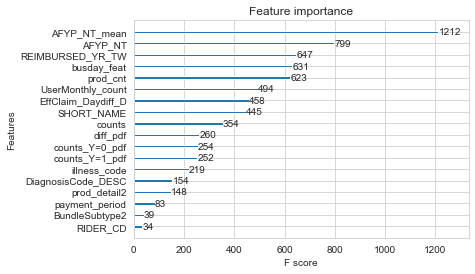

In [111]:
xgb.plot_importance(bst)

In [112]:
from sklearn import metrics
pre = metrics.precision_score(test_set['Y'],test_set['y_pred_prob'])
re = metrics.recall_score(test_set['Y'],test_set['y_pred_prob'])
f1 = metrics.f1_score(test_set['Y'],test_set['y_pred_prob'])
print('Precision:',pre,'\n'
     'Recall:',re,'\n'
     'F1:',f1)

Precision: 0.9265931096599865 
Recall: 0.8458376156217883 
F1: 0.8843756716097142
